In [15]:
import numpy as np
import matplotlib.pyplot as plt
from src.data_preproc.preprocessing import DataPreprocessor
from src.utils.lorentz_vector import LorentzVector
import seaborn as sns

In [16]:
# truth_cuts = DataPreprocessor(data_path="/mnt/c/Users/Lennart/Desktop/Studium/MLUnfoldingForBellTests/data/hww_simulated_final.csv", cuts=True, splits=False)
truth = DataPreprocessor(data_path="/mnt/c/Users/Lennart/Desktop/Studium/MLUnfoldingForBellTests/data/df_final.csv", cuts=False, splits=False)
truth_cuts = DataPreprocessor(data_path="/mnt/c/Users/Lennart/Desktop/Studium/MLUnfoldingForBellTests/data/df_final.csv", cuts=True, splits=False)

X_cuts, y_cuts = truth_cuts.run_preprocessing()
X, y = truth.run_preprocessing()

In [17]:
# Take first 50000 events
X = X
y = y
X_cuts = X_cuts
y_cuts = y_cuts

In [18]:
# Turn into LorentzVectors
lep1 = np.array([LorentzVector(X[i,:4]) for i in range(X.shape[0])])
lep1_cuts = np.array([LorentzVector(X_cuts[i,:4]) for i in range(X_cuts.shape[0])])

In [19]:
# Return pt
lep1_pt = np.array([lep1[i].get_pt() for i in range(len(lep1))])
lep1_pt_cuts = np.array([lep1_cuts[i].get_pt() for i in range(len(lep1_cuts))])

In [20]:
print(lep1_pt.shape)
print(lep1_pt_cuts.shape)

(50000,)
(13516,)


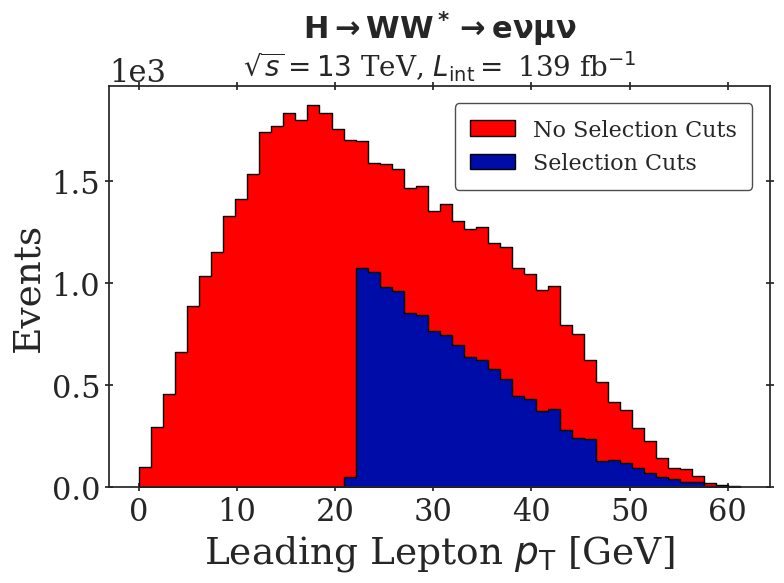

In [21]:
# Plot pt in histogram
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_theme(style="white", palette="pastel", font = 'serif', )

sns.histplot(lep1_pt, bins=50,
            element='step',
            color='red',
            alpha=1,
            fill=True,
            legend=True,
            linewidth=1,
            label="No Selection Cuts",
            binrange=(min(lep1_pt), max(lep1_pt)),
            edgecolor='black'
            )

sns.histplot(lep1_pt_cuts, bins=50,
            color='#000ca8',
            element='step',
            fill=True,
            alpha=1,
            legend=True,
            linewidth=1,
            label="Selection Cuts",
            binrange=(min(lep1_pt), max(lep1_pt)),
            edgecolor='black'
            )

plt.xlabel(r"Leading Lepton $p_{\text{T}}$ [GeV]", fontsize=27)
plt.ylabel("Events", fontsize=27)

plt.tick_params(axis='both', which='major', labelsize=22, bottom=True, top=True, left=True, right=True, direction='inout')
plt.legend(
    fontsize='16',
    fancybox=True,
    borderpad=0.7,
    frameon=True,
    framealpha=0.7,
    facecolor='white',
    edgecolor='black',
    borderaxespad=0.8
)
plt.title(r'$\mathbf{H\to WW^* \to e\nu \mu\nu}$' + '\n', fontsize=22)
plt.text(0.5, 1.05, r'$\sqrt{s}=13$ TeV, $L_{\mathrm{int}}=$ 139 fb$^{-1}$', fontsize=20, ha='center', va='center', transform=ax.transAxes)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_fontsize(22)
plt.tight_layout()
plt.savefig("reports/leading_lepton_pt.png")